In [87]:
import pandas as pd
import json
import plotly.express as px
import plotly.graph_objects as go

In [81]:
# Movie metadata
movie_md_cols = [
'Wikipedia movie ID',
'Freebase movie ID',
'Movie name',
'Movie release date',
'Movie box office revenue',
'Movie runtime',
'Movie languages (Freebase ID:name tuples)',
'Movie countries (Freebase ID:name tuples)',
'Movie genres (Freebase ID:name tuples)',
]
movie_md = pd.read_csv('data/movie.metadata.tsv', sep='\t', names=movie_md_cols)
print('Number of movies:', movie_md.shape[0])
movie_md.head(2)

Number of movies: 81741


,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples)
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."


In [82]:
# Character metadata
char_md_cols = ['Wikipedia movie ID',
'Freebase movie ID',
'Movie release date',
'Character name',
'Actor date of birth',
'Actor gender',
'Actor height (in meters)',
'Actor ethnicity (Freebase ID)',
'Actor name',
'Actor age at movie release',
'Freebase character/actor map ID',
'Freebase character ID',
'Freebase actor ID',
]
char_md = pd.read_csv('data/character.metadata.tsv', sep='\t', names=char_md_cols)
print('Number of characters:', char_md.shape[0])
char_md.head(2)

Number of characters: 450669


,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.62,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.78,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4


In [83]:
completness_movies = movie_md.isna()
completness_movies_sum = completness_movies.sum()/movie_md.shape[0]*100
completness_movies_sum

Wikipedia movie ID                            0.000000
Freebase movie ID                             0.000000
Movie name                                    0.000000
Movie release date                            8.443743
Movie box office revenue                     89.722416
Movie runtime                                25.018045
Movie languages (Freebase ID:name tuples)     0.000000
Movie countries (Freebase ID:name tuples)     0.000000
Movie genres (Freebase ID:name tuples)        0.000000
dtype: float64

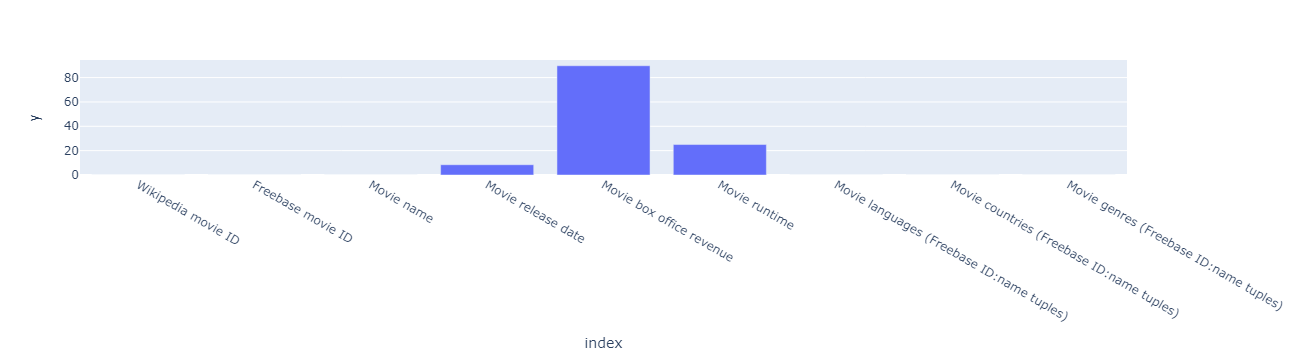

In [84]:
fig_movies = px.bar(completness_movies_sum, y=completness_movies_sum)
fig_movies.show()

In [85]:
completness_chars = char_md.isna()
completness_chars_sum = completness_chars.sum()/char_md.shape[0]*100
completness_chars_sum

Wikipedia movie ID                  0.000000
Freebase movie ID                   0.000000
Movie release date                  2.217814
Character name                     57.220488
Actor date of birth                23.552763
Actor gender                       10.120288
Actor height (in meters)           65.645740
Actor ethnicity (Freebase ID)      76.466542
Actor name                          0.272484
Actor age at movie release         35.084064
Freebase character/actor map ID     0.000000
Freebase character ID              57.218269
Freebase actor ID                   0.180842
dtype: float64

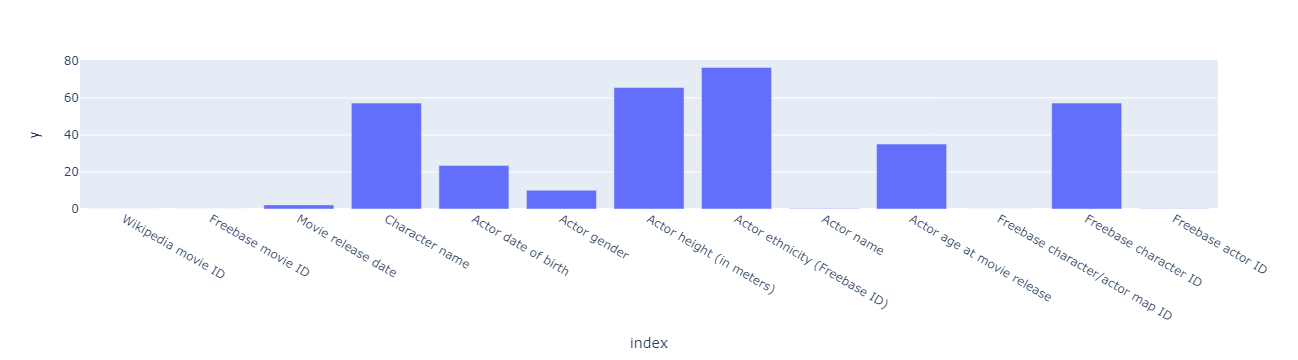

In [86]:
fig_chars = px.bar(completness_chars_sum, y=completness_chars_sum)
fig_chars.show()

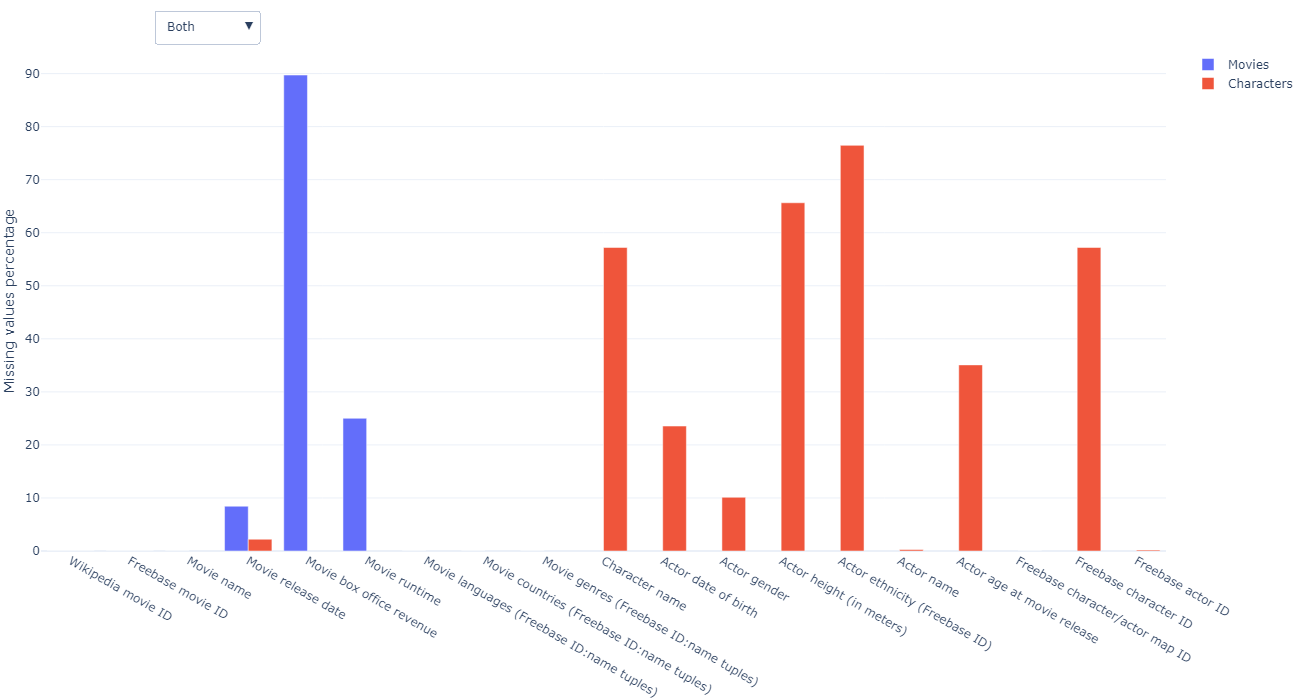

In [138]:

fig = go.Figure(data=[go.Bar(
    name='Movies',
    x=completness_movies_sum.keys(),
    y=completness_movies_sum
),
    go.Bar(
    name='Characters',
    x=completness_chars_sum.keys(),
    y=completness_chars_sum
)
])

# Update plot sizing
fig.update_layout(
    width=1200,
    height=700,
    autosize=False,
    margin=dict(t=0, b=0, l=0, r=0),
    template="plotly_white",
)

fig.update_yaxes(title_text="Missing values percentage")

# Add dropdown
fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="Both",
                     method="update",
                     args=[{"visible": [True, True]},
                           {"title": "Both"}]),
                dict(
                    args=[{"visible": [True, False]},
                           {"title": "Movies",
                            }],
                    label="Movies",
                    method="update"
                ),
                dict(
                    args=[{"visible": [False, True]},
                           {"title": "Characters",
                            }],
                    label="Characters",
                    method="update"
                )
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)

fig.show()

In [139]:
fig.write_html("missing_values.html")